In [1]:
# imports 
import numpy as np
import pandas as pd
import os
from ydata_profiling import ProfileReport 
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px

# base bank dataset

In [11]:
df = pd.read_csv("../dataset/bank/bank-full.csv", delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
profile = ProfileReport(df, title="Profiling Base Bank dataset Report", correlations={
        "auto": {"calculate": False},
        "pearson": {"calculate": False},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": True},
        "cramers": {"calculate": True},
    })
os.makedirs("./../mount/eda_profile_reports", exist_ok=True)
profile.to_file("./../mount/eda_profile_reports/base_bank_dataset.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Notes

#### Null values

- There are no case of Null value entries. 
- However some of the fields are having some unknown value categories. 
- Most of these categorical fields having these unknown values have limited number of unknow values.
- However, poutcome (outcome of the previous campaign) has over 80% of its values as unknown, making it difficult to be used 

#### Outliers

- The balance field (average yearly bank balance) seems to be a bit un-reliable data source as there are a high percentage (7.8%) of zero avg balance and also high percentage (8.3%) of negative balance.
- The duration field (last contact duration in seconds) has some outliers in the higher end of the spread.
- Just like duration field, the campaign field (number of contacts performed in this campaign) has a large tail towards the higher end of the spread.
- pdays (number of days passed till last contacted) also has small number of data points stretched towards larger values.
- previous (contacts performed before this campaign) has one outlier value (valued at 275)

#### Skewed Fields

- poutcome
- previous
- pdays

#### Correlations between data features

- poutcome, previous and pdays are highly correlated because for 80% of the data-points they have unknown values
- age, job and education fields are highly correlated with each other
- contact, housing and month fields are highly correlated


# additional bank dataset

In [2]:
df = pd.read_csv("../dataset/bank-additional/bank-additional-full.csv", delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [15]:
profile = ProfileReport(df, title="Profiling Additional Bank dataset Report", correlations={
        "auto": {"calculate": False},
        "pearson": {"calculate": False},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": True},
        "cramers": {"calculate": True},
    })
os.makedirs("./../mount/eda_profile_reports", exist_ok=True)
profile.to_file("./../mount/eda_profile_reports/additional_bank_dataset.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


### Notes

#### Duplicate entries
- Duplicate entries exists and need to be removed

### Non numeric fields
- 10 inputs are categorical:- job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y (target_variable)

#### Null values

- There are no case of Null value entries. 
- However some of the fields are having some unknown value categories. 
- Most of these categorical fields having these unknown values have limited number of unknow values.
- However, poutcome (outcome of the previous campaign) has over 80% of its values as unknown, making it difficult to be used 

#### Distributions

- The duration field (last contact duration in seconds) has some outliers in the higher end of the spread.
- Just like duration field, the campaign field (number of contacts performed in this campaign) has a large tail towards the higher end of the spread.
- pdays (number of days passed till last contacted) is set to 999 in the case where the contact is being made for the first time. Unlike -1 in the earlier dataset.
- pdays (number of days passed till last contacted) also has small number of data points stretched towards larger values.

#### Skewed/high unbalance Fields

- the default field (has credit in default?) is almost unusable field as most values are either no or unknown
- pdays

#### Correlations between data features

- poutcome, previous and pdays are highly correlated because for 80% of the data-points they have unknown values
- age, job and education fields are highly correlated with each other
- contact and month fields are highly correlated
- housing and load fields are highly correlated

- **Remark on Correlations**:- Only the fields related to social and economic context attributes have high levels of correlations. Other than that, the other high correlation alerts can be ignored

# check correlations

In [10]:
# convert the categorical columns to labels 

from sklearn.preprocessing import LabelEncoder 

def label_encode_categorical_columns(df):
    """
    Identify and label encode all categorical columns in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    
    Returns:
    pd.DataFrame: The DataFrame with categorical columns label encoded.
    """
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
        label_encoders[column] = label_encoder
    return df, label_encoders

label_encoded_df, encoders = label_encode_categorical_columns(df)

In [11]:
label_encoded_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

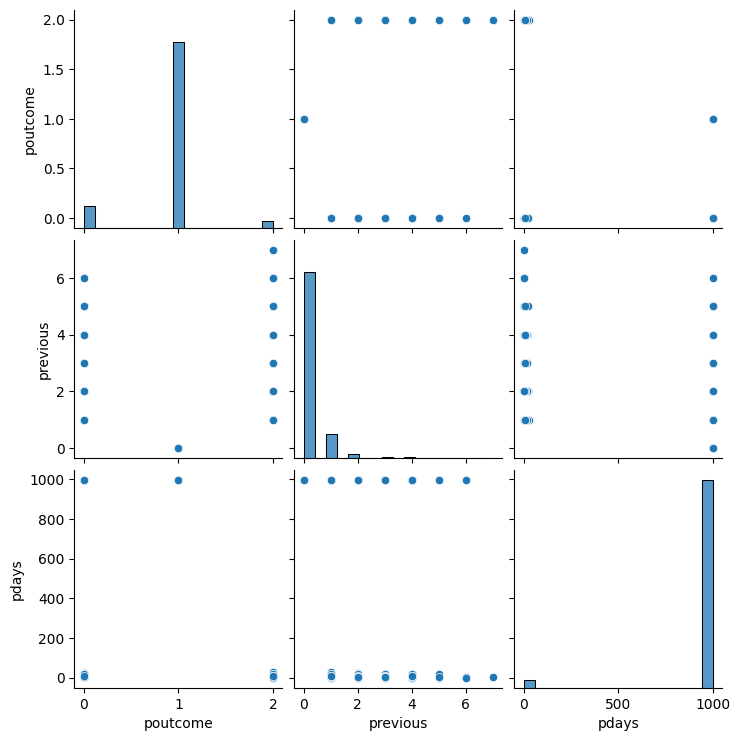

In [12]:
# see the correlated features

sub_df = label_encoded_df[['poutcome', 'previous', 'pdays']]
pair_plt = sns.pairplot(sub_df)
    
# Show the plot
plt.show()

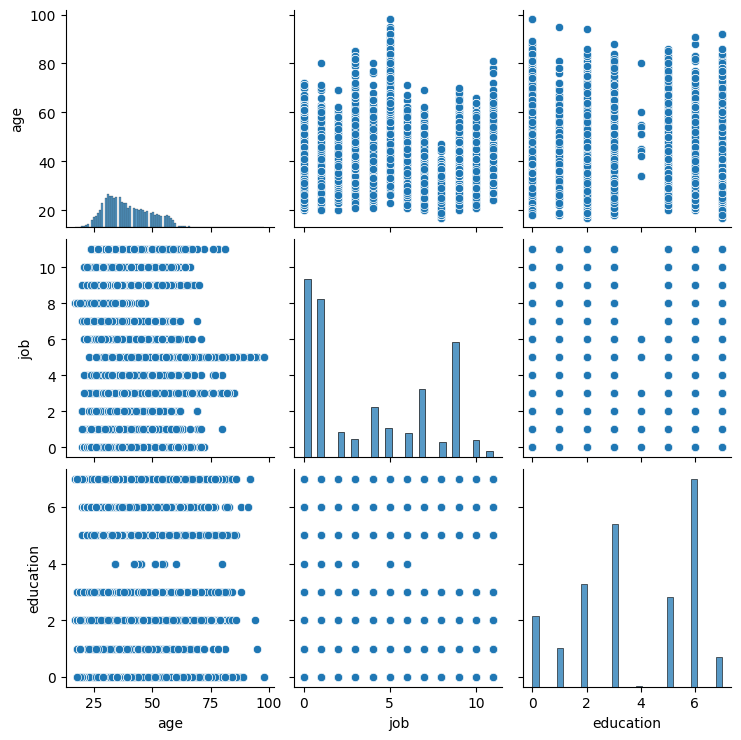

In [13]:
sub_df = label_encoded_df[['age', 'job', 'education']]
pair_plt = sns.pairplot(sub_df)
    
# Show the plot
plt.show()

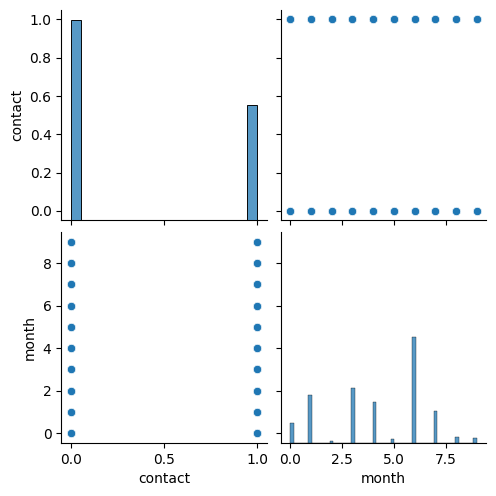

In [14]:
sub_df = label_encoded_df[['contact', 'month']]

pair_plt = sns.pairplot(sub_df)
plt.show()

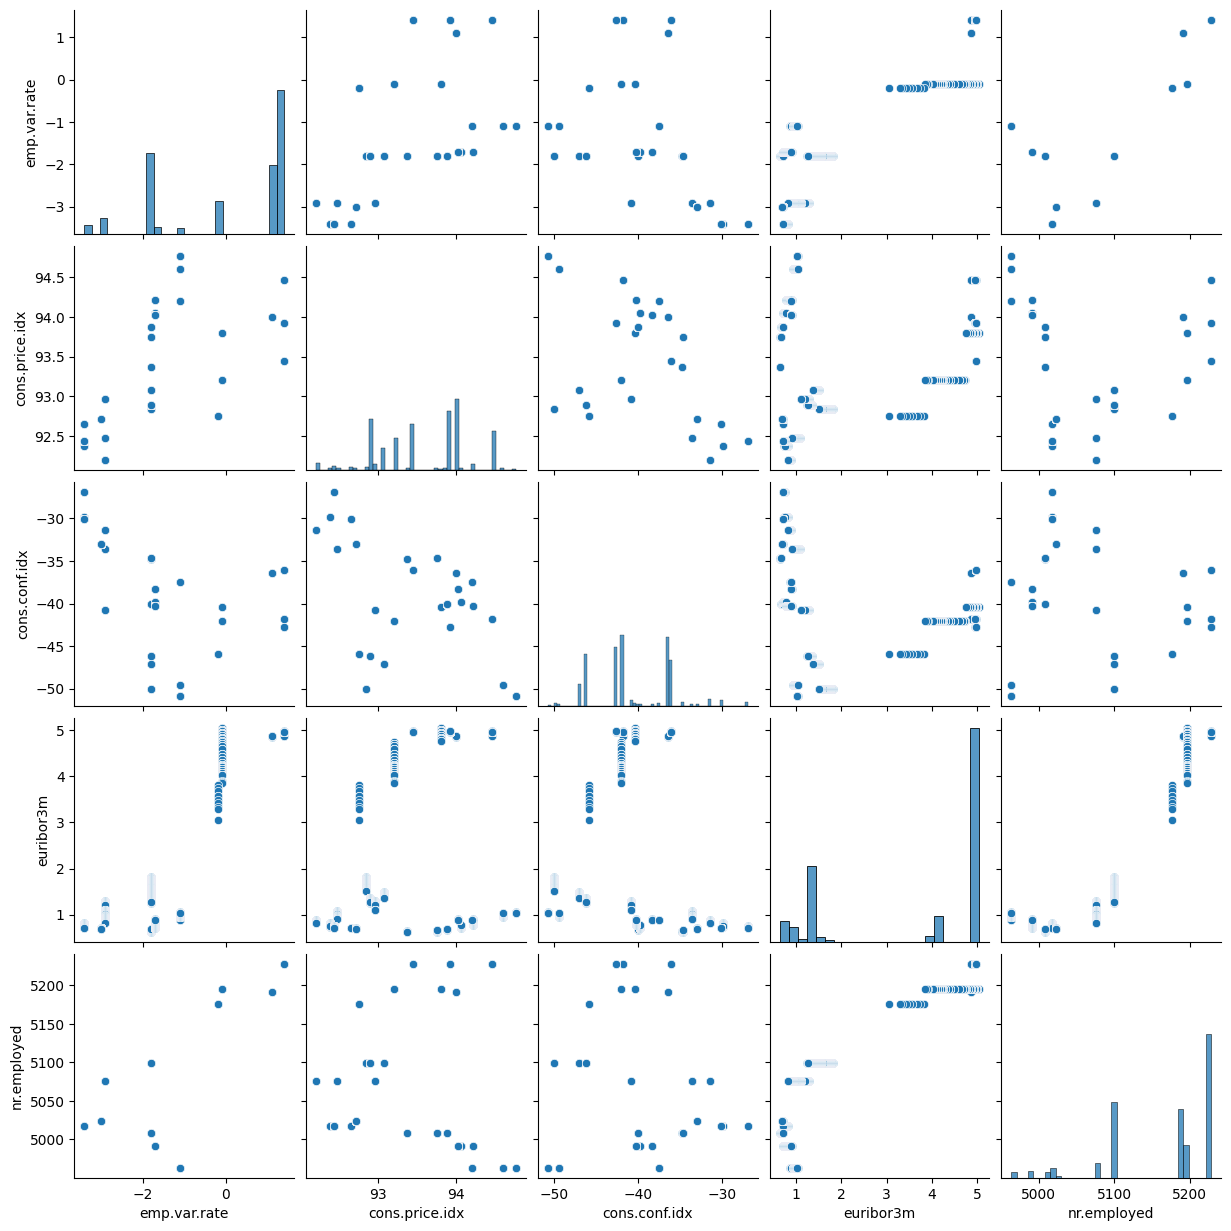

In [15]:
sub_df = label_encoded_df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

pair_plt = sns.pairplot(sub_df)
plt.show()